# Linear Discriminative Analysis

Usaremos el dataset de Wine, un conjunto de datos clásico que contiene información estadística sobre diferentes tipos de vino basados en su composición química.

El objetivo será clasificar los vinos en tres clases diferentes basándonos en sus características.

### Importamos las bibliotecas necesarias

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset

In [2]:
data = load_wine()
X = data.data  # Características
y = data.target  # Clases objetivo

Mostramos información básica del dataset

In [3]:
print("Características del dataset:", data.feature_names)
print("Clases objetivo:", data.target_names)
print("Tamaño del dataset:", X.shape)

Características del dataset: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Clases objetivo: ['class_0' 'class_1' 'class_2']
Tamaño del dataset: (178, 13)


### Dividimos los datos en entrenamiento y prueba (Holdout)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train.shape

(124, 13)

### Estandarizamos las características

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ajustamos el modelo LDA

In [7]:
lda = LinearDiscriminantAnalysis() #default min(n_classes - 1, n_features)
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

### Evaluamos el modelo

In [8]:
y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

Accuracy del modelo: 1.00


### Proyectamos los datos en el espacio LDA

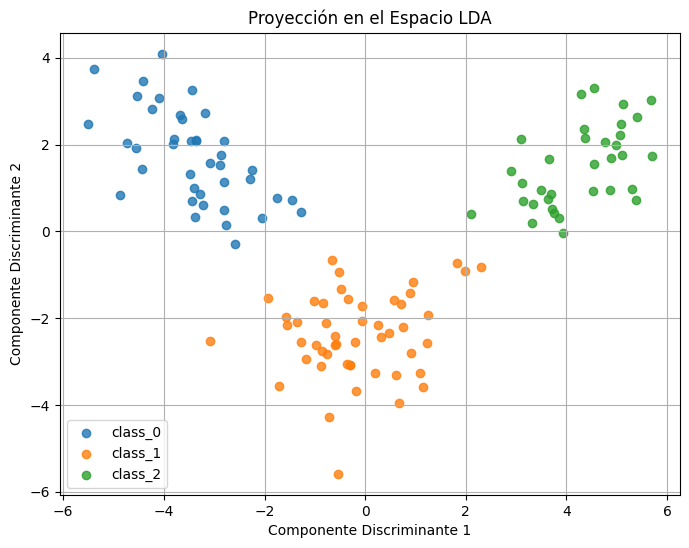

In [9]:
# Proyectamos los datos al espacio discriminante lineal
X_lda = lda.transform(X_train_scaled)

# Visualizamos la proyección
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], alpha=0.8, label=target_name)
plt.legend()
plt.title("Proyección en el Espacio LDA")
plt.xlabel("Componente Discriminante 1")
plt.ylabel("Componente Discriminante 2")
plt.grid()
plt.show()
